In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
df = pd.read_csv('Advertising.csv')

In [24]:
print(df.head())
print(df.info())
print(df.isnull().sum())

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None
Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


In [25]:
df.ffill(inplace=True)
df = pd.get_dummies(df, drop_first=True)

In [26]:
X = df.drop('Sales', axis=1)
y = df['Sales']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred = model.predict(X_test)

In [43]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')

Mean Squared Error: 3.20
R² Score: 0.90


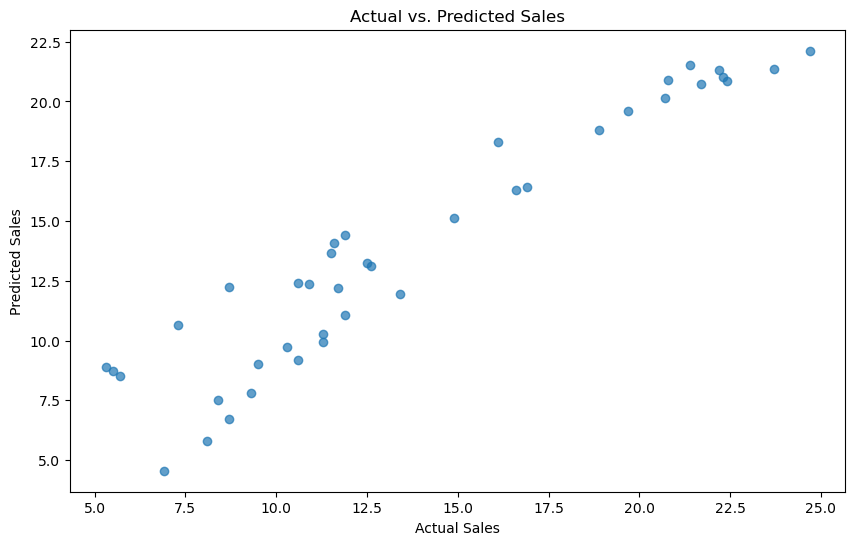

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.show()

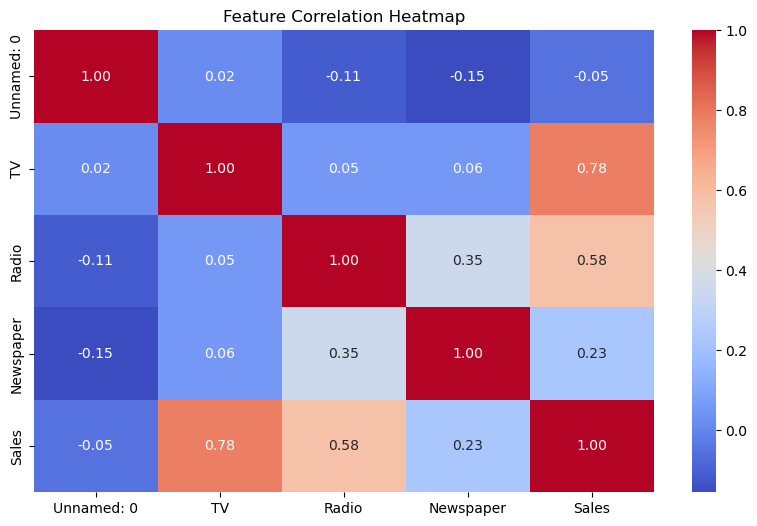

In [32]:
correlation = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training Data Size:", X_train.shape)
print("Testing Data Size:", X_test.shape)

Training Data Size: (160, 4)
Testing Data Size: (40, 4)


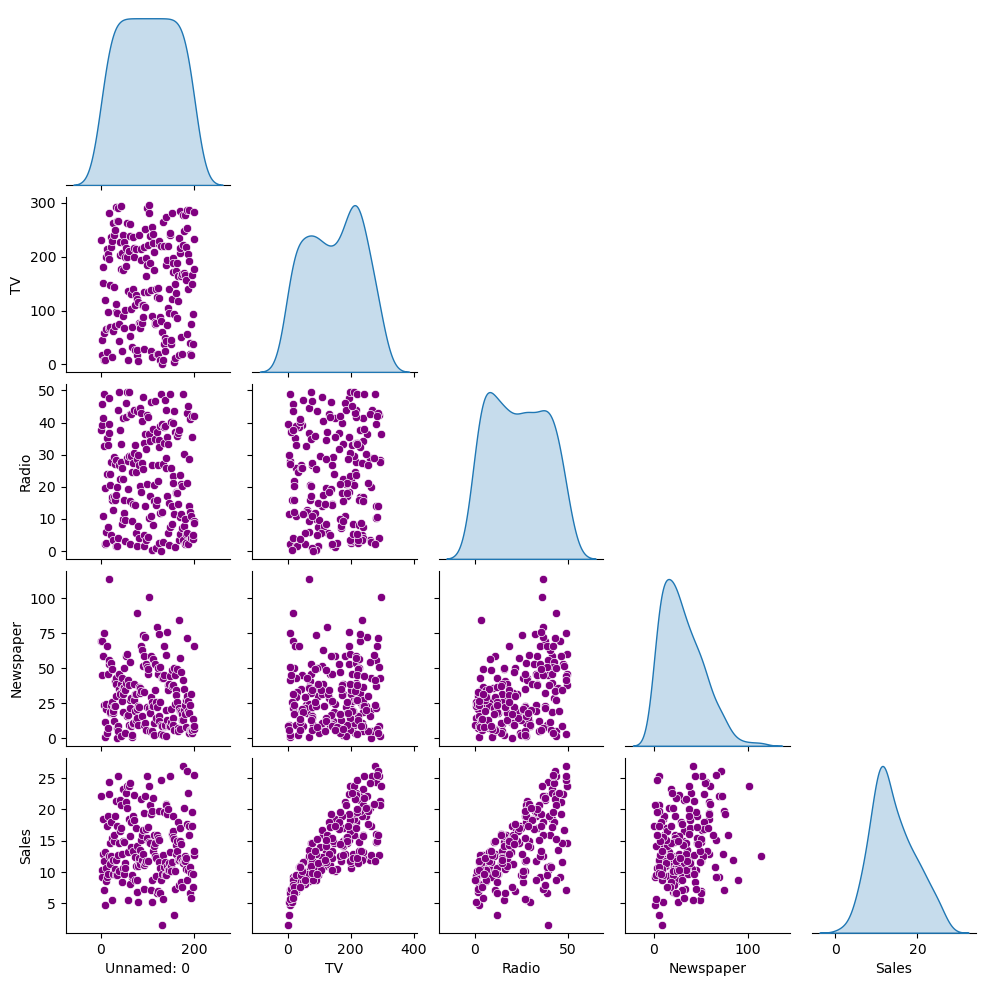

UsageError: unrecognized arguments: # Only if you're running on Jupyter Notebook


In [39]:
sns.pairplot(df, height=2, aspect=1, corner=True, diag_kind='kde', plot_kws={'color': 'purple'})
plt.show()
%matplotlib inline

In [52]:
import numpy as np
import pandas as pd
new_budget = np.array([[0, 234, 39, 7911]])
new_budget_df = pd.DataFrame(new_budget, columns=X.columns)
predicted_sales = model.predict(new_budget_df)
print(f"\nEstimated Sales for Given Budget: {predicted_sales[0]:.2f} units")


Estimated Sales for Given Budget: 44.85 units
